This executable notebook will help you complete Pset 3.

A reminder about a few Colab-specific things to note about execution before we get started:

- Google offers free compute (including GPU compute!) on this notebook, but *only for a limited time*. Your session will be automatically closed after 12 hours. That means you'll want to finish within 12 hours of starting, or make sure to save your intermediate work (see the next bullet).
- You can save and write files from this notebook, but they are *not guaranteed to persist*. For this reason, we'll mount a Google Drive account and write to that Drive when any files need to be kept permanently.
- You should keep this tab open until you're completely finished with the notebook. If you close the tab, your session will be marked as "Idle" and may be terminated.

# Getting started

**First**, make a copy of this notebook so you can make your own changes. Click *File -> Save a copy in Drive*.

### What you need to do

Read through this notebook and execute each cell in sequence, making modifications and adding code where necessary. You should execute all of the code as instructed, and make sure to write code or textual responses wherever the text **TODO** shows up in text and code cells.

When you're finished, choose *File -> Download .ipynb*. You will upload this `.ipynb` file as part of your submission.


## 1) Logistic Regression

### Background: logistic regression for binomial ordering preferences

We'll walk you through the example of logistic regression that we covered during class, where we took a dataset of binomial expressions and inferred the relative strengths of the short-before-long and frequent-before-infrequent ordering preferences.  We first load the dataset, which consists of a number of binomial expressions each of which was observed once in a sample of the Brown corpus, in the order given in the dataset.  In this dataset, `Syl` and `Freq` respectively denote whether the observed ordering matches the preference (an entry of `1`), violates the preference (an entry of `-1`), or is irrelevant for the preference (an entry of `0`, indicating that either ordering would satisfy the preference).  `Percept` indicates matching or violation of the perceptual markedness preference, and `Response` is a dummy variable whose value is always `1`, which we will use in fitting the logistic regression model.

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
d = pd.read_csv("https://gist.githubusercontent.com/omershubi/b577698c3f497f43df453d28c9c580fd/raw/6480ca2da71a42f75b490baa5387773f3aeb72e1/single_count_binomials.txt",header=0,sep=" ")
d

,Binomial,Percept,Syl,Freq,Response
1,abused and neglected,0,1,1,1
2,accept and hire,0,0,1,1
3,achieved and maintained,0,0,1,1
4,actively and continually,0,1,-1,1
5,adding and using,0,0,-1,1
...,...,...,...,...,...
326,wide and varied,0,1,1,1
327,wiry and fit,0,-1,-1,1
328,WordPerfect and Lotus,0,-1,-1,1
329,worried and troubled,0,0,1,1


Recall that logistic regression involves the following equations for predictors $\{X_i\}$:

$\eta = \sum_i \beta_i X_i$ (the **linear predictor**)

$P($outcome$=$success$) =\frac{e^{\eta}}{1 + e^{\eta}}$ (outcomes are Bernoulli distributed around the mean resulting from a logistic transformation of the linear predictor)

We have two predictors: $X_1$ is `Syl` and $X_2$ is `Freq`.  We use the `statsmodels` Python package to fit this logistic regression model to our dataset and infer the parameter weights $\{\beta_i\}$, which correspond to the preference strengths.  In `statsmodels`, as in most software packages implementing logistic regression, it is a convention that the numeric coding of the outcome or response is `1` for "success" and `0` otherwise.  Also as in most software packages for logistic regression, we use matrix formats to represent the response & predictors: so if there are $M$ predictors and $N$ observations, then the predictor set is represented as an $M \times N$ matrix and the response variable is represented as a $1 \times N$ matrix (effectively a length-$N$ vector).  We split our dataset into predictor and response matrices, and then fit a logistic regression model.

(In `statsmodels`, as with many statistical software packages, logistic regression is implemented as a special case of the more general framework of generalized linear models (GLMs), which is why the third line of the below cell looks the way it does.  We won't be covering GLMs in this class, but you may encounter them in other statistics classes or, perhaps less likely, in machine-learning classes.)

In [ ]:
x = d[["Syl","Freq"]]
y = d[["Response"]]
m = sm.GLM(y,x,family=sm.families.Binomial())
m_results = m.fit()
print(m_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                  330
Model:                            GLM   Df Residuals:                      328
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Fri, 09 May 2025   Deviance:                       427.90
Time:                        08:21:29   Pearson chi2:                     330.
No. Iterations:                     4   Pseudo R-squ. (CS):             -2.657
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Syl            0.4825      0.154      3.131      0.0

The `coef` results of `0.48` for `Syl` and `0.40` match those we covered in class.

How well are we able to predict the ordering of a binomial we haven't previously seen will occur in?  To estimate this, we'll create a random 80/20 train/test split of our binomials data, estimate our logistic regression weights using the training dataset, and then see how often our prediction is successful ($P(success)>0.5$ for the observed ordering of the test-set binomial).  First we create our train/test split:

In [ ]:
import math, random
N = d.shape[0]
N_train = math.floor(N*4/5)
idx = list(range(N))
random.seed(3) # so that results will be reproducible from run to run
random.shuffle(idx)
idx_train = idx[0:N_train]
idx_test = idx[N_train:N]
print(idx_train)
print(idx_test)
d_train = d.iloc[idx_train]
d_test = d.iloc[idx_test]
print(d_train)

[272, 78, 13, 285, 211, 48, 188, 291, 292, 191, 244, 46, 233, 311, 139, 308, 70, 250, 287, 222, 192, 264, 54, 252, 163, 269, 180, 17, 238, 147, 38, 22, 220, 280, 41, 99, 239, 299, 288, 89, 135, 95, 146, 231, 42, 131, 312, 207, 224, 302, 138, 249, 289, 3, 274, 229, 142, 62, 12, 263, 171, 51, 124, 329, 165, 31, 120, 88, 226, 29, 304, 201, 36, 149, 58, 205, 122, 170, 127, 65, 102, 190, 0, 25, 230, 87, 206, 52, 169, 91, 97, 209, 182, 101, 59, 123, 193, 37, 268, 16, 254, 44, 144, 126, 293, 134, 105, 115, 130, 214, 200, 23, 73, 114, 107, 103, 40, 266, 159, 4, 166, 100, 28, 277, 283, 72, 113, 55, 325, 20, 43, 112, 57, 175, 82, 186, 24, 245, 261, 270, 61, 290, 56, 128, 232, 322, 265, 318, 204, 327, 177, 221, 275, 185, 47, 93, 260, 300, 228, 151, 76, 116, 219, 64, 94, 168, 178, 181, 294, 125, 237, 155, 173, 90, 314, 85, 160, 328, 321, 258, 161, 241, 262, 212, 5, 216, 148, 251, 2, 217, 140, 195, 257, 326, 284, 256, 234, 295, 184, 162, 110, 286, 235, 158, 26, 271, 174, 152, 164, 313, 133, 117, 21

And now we train a logistic model on only the training set, predict success probability for the observed binomials in the test set, and see how often we "succeed":

In [ ]:
x_train = d_train[["Syl","Freq"]]
y_train = d_train[["Response"]]
m = sm.GLM(y_train,x_train,family=sm.families.Binomial())
m_results = m.fit()
print(m_results.summary())
x_test = d_test[["Syl","Freq"]]
y_predicted = m_results.predict(x_test)
np.mean(y_predicted>0.5)


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                  264
Model:                            GLM   Df Residuals:                      262
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -170.38
Date:                Fri, 09 May 2025   Deviance:                       340.77
Time:                        08:21:29   Pearson chi2:                     264.
No. Iterations:                     4   Pseudo R-squ. (CS):             -2.636
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Syl            0.5005      0.171      2.931      0.0

np.float64(0.6363636363636364)

The answer: apparently somewhat better than 50/50 chance!

Another measure of how well a model fits a dataset is the log-likelihood it assigns to the data.  

In [ ]:
sum(np.log(y_predicted)) # large (less negative) values indicate better fit.

-43.59055060217463

## Accuracy and Log-likelihood

Note, in the binary classification case, accuracy is defined as:
$$Acc = \frac{1}{N} \sum_i  \mathbb{1}\{\hat{y_i}==y_i\}$$
Where

$$\hat{y_i} = 1 \ \textbf{if} \ \hat{p(x_i)}>0.5 \  \textbf{else} \ 0$$


And log likelihood is defined as:

$$L = \sum_i [y_i\cdot log(p(x_i)) + (1-y_i) \cdot log(1-p(x_i))] $$



### A new application of logistic regression: the dative alternation

The work you need to do for this pset involves applying logistic regression to a new case, the **dative alternation**, which we studied in a previous pset.  We will use the `dative` dataset from Bresnan et al. (2007).  First we load the dataset:

In [ ]:
dat = pd.read_csv("https://gist.githubusercontent.com/omershubi/278815a736401d36021aa9fe31b9a0cb/raw/cf338a8cf745fa5820c4ea97af682d265bc1a34f/dative-alternation.csv")
dat

,Unnamed: 0,Speaker,Modality,Verb,SemanticClass,LengthOfRecipient,AnimacyOfRec,DefinOfRec,PronomOfRec,LengthOfTheme,AnimacyOfTheme,DefinOfTheme,PronomOfTheme,RealizationOfRecipient,AccessOfRec,AccessOfTheme
0,1,NaN,written,feed,t,1,animate,definite,pronominal,14,inanimate,indefinite,nonpronominal,NP,given,new
1,2,NaN,written,give,a,2,animate,definite,nonpronominal,3,inanimate,indefinite,nonpronominal,NP,given,new
2,3,NaN,written,give,a,1,animate,definite,nonpronominal,13,inanimate,definite,nonpronominal,NP,given,new
3,4,NaN,written,give,a,1,animate,definite,pronominal,5,inanimate,indefinite,nonpronominal,NP,given,new
4,5,NaN,written,offer,c,2,animate,definite,nonpronominal,3,inanimate,definite,nonpronominal,NP,given,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,3258,S1190,spoken,tell,c,1,animate,definite,pronominal,1,inanimate,definite,pronominal,NP,given,given
3259,3259,S1423,spoken,give,a,1,animate,definite,pronominal,9,inanimate,indefinite,nonpronominal,NP,given,accessible
3260,3260,S1680,spoken,give,a,4,animate,indefinite,nonpronominal,2,inanimate,definite,nonpronominal,PP,accessible,accessible
3261,3261,S1680,spoken,give,a,1,inanimate,definite,pronominal,2,inanimate,indefinite,nonpronominal,NP,given,accessible


We see that it uses text values for some of the variables we are interested in (the response variable `RealizationOfRecipient`, and the variables expressing length and pronominality of theme and object).  We create numeric versions of these variables, arbitrarily coding a double object outcome as `1` ("success") and a prepositional dative outcome as `0`.

In [ ]:
dat["Response"] = [1 if x =="NP" else 0 for x in dat["RealizationOfRecipient"]]
dat["RecPro"] = [1 if x =="pronominal" else 0 for x in dat["PronomOfRec"]]
dat["ThemePro"] = [1 if x =="pronominal" else 0 for x in dat["PronomOfTheme"]]
dat[["RealizationOfRecipient","Response","PronomOfRec","RecPro","ThemePro"]]

,RealizationOfRecipient,Response,PronomOfRec,RecPro,ThemePro
0,NP,1,pronominal,1,0
1,NP,1,nonpronominal,0,0
2,NP,1,nonpronominal,0,0
3,NP,1,pronominal,1,0
4,NP,1,nonpronominal,0,0
...,...,...,...,...,...
3258,NP,1,pronominal,1,1
3259,NP,1,pronominal,1,0
3260,PP,0,nonpronominal,0,0
3261,NP,1,pronominal,1,0


To capture the possibility of an overall preference for one construction or the other, we add an "intercept" term to the logistic regression model, by creating a new `Dummy` variable in the data frame.  We then fit a baseline model using only the intercept and find that there is an overall majority preference for the **DO** realization in this dataset (the intercept's fitted weight is greater than 0).  We also see that the intercept-only model simply recapitulates the sample mean.

In [ ]:
dat["Dummy"] = 1
x = dat[["Dummy"]]
y = dat[["Response"]]
m = sm.GLM(y,x,family=sm.families.Binomial()) # first argument is response, second argument is predictor matrix, third argument says this is logistic regression
m_results = m.fit()
print(m_results.summary())
print("Predicted proportion of DO outcomes based on fitted intercept-only model:", round(np.mean(m_results.predict(x)),4))
print("Proportion of data with DO outcome:", round(np.mean(y["Response"]),4)) # same as model-predicted proportion

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                 3263
Model:                            GLM   Df Residuals:                     3262
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1870.5
Date:                Fri, 09 May 2025   Deviance:                       3741.1
Time:                        08:21:29   Pearson chi2:                 3.26e+03
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Dummy          1.0450      0.040     26.189      0.0

**Task:** In the below code boxes, complete the five parts of the problem specified in the pset PDF.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

X = dat[["RecPro","Dummy"]]
y = dat["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()

y_pred_proba = results.predict(X_test)
y_pred_class = [1 if p > 0.5 else 0 for p in y_pred_proba]

accuracy = accuracy_score(y_test, y_pred_class)
print("Classification accuracy on test set:", round(accuracy, 4))

log_likelihood = -log_loss(y_test, y_pred_proba, normalize=False)
print("Log-likelihood on test set:", round(log_likelihood, 4))

Classification accuracy on test set: 0.709
Log-likelihood on test set: -315.5161


There is a small improvement in the accuracy and a larger improvement in the log likelihood

In [ ]:
X2 = dat[["RecPro", "ThemePro","Dummy"]]
y = dat["Response"]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = sm.GLM(y_train, X2_train, family=sm.families.Binomial())
results2 = model2.fit()

y_pred_proba2 = results2.predict(X2_test)
y_pred_class2 = [1 if p > 0.5 else 0 for p in y_pred_proba2]

accuracy2 = accuracy_score(y_test, y_pred_class2)
print("Classification accuracy with RecPro + ThemePro:", round(accuracy2, 4))

log_likelihood2 = -log_loss(y_test, y_pred_proba2, normalize=False)
print("Log-likelihood with RecPro + ThemePro:", round(log_likelihood2, 4))


Classification accuracy with RecPro + ThemePro: 0.7795
Log-likelihood with RecPro + ThemePro: -259.1616


With the additional methods we get an increase in both accuracy and log-likelyhood scores.

In [ ]:
dat["LogRecLen"] = np.log(dat["LengthOfRecipient"] )
dat["LogThemeLen"] = np.log(dat["LengthOfTheme"] )

X_raw = dat[["RecPro", "ThemePro", "LengthOfRecipient", "LengthOfTheme","Dummy"]]
y = dat["Response"]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

model_raw = sm.GLM(y_train, X_train_raw, family=sm.families.Binomial())
results_raw = model_raw.fit()

y_pred_proba_raw = results_raw.predict(X_test_raw)
y_pred_class_raw = [1 if p > 0.5 else 0 for p in y_pred_proba_raw]

acc_raw = accuracy_score(y_test, y_pred_class_raw)
ll_raw = -log_loss(y_test, y_pred_proba_raw, normalize=False)


X_log = dat[["RecPro", "ThemePro", "LogRecLen", "LogThemeLen","Dummy"]]
X_train_log, X_test_log, _, _ = train_test_split(X_log, y, test_size=0.2, random_state=42)

model_log = sm.GLM(y_train, X_train_log, family=sm.families.Binomial())
results_log = model_log.fit()

y_pred_proba_log = results_log.predict(X_test_log)
y_pred_class_log = [1 if p > 0.5 else 0 for p in y_pred_proba_log]

acc_log = accuracy_score(y_test, y_pred_class_log)
ll_log = -log_loss(y_test, y_pred_proba_log, normalize=False)

print("Model A - Raw Lengths:")
print("  Accuracy:", round(acc_raw, 4))
print("  Log-likelihood:", round(ll_raw, 4))

print("\nModel B - Log-transformed Lengths:")
print("  Accuracy:", round(acc_log, 4))
print("  Log-likelihood:", round(ll_log, 4))



Model A - Raw Lengths:
  Accuracy: 0.8469
  Log-likelihood: -212.5366

Model B - Log-transformed Lengths:
  Accuracy: 0.8453
  Log-likelihood: -213.91


After comparing the accuracy and log-likelihood of the models, it appears that including length information improves both metrics relative to models that omit it. This suggests that the lengths of the recipient and theme are meaningfully correlated with the choice of dative construction. However, the difference between using raw lengths and their logarithmic transformations is minimal. The accuracy remains nearly unchanged, and the slight difference in log-likelihood could easily be attributed to random variation or dataset-specific bias. As a result, it's difficult to draw a strong conclusion about whether one transformation is truly better than the other.



In [ ]:
print(results_log.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                 2610
Model:                            GLM   Df Residuals:                     2605
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -896.01
Date:                Fri, 09 May 2025   Deviance:                       1792.0
Time:                        08:21:29   Pearson chi2:                 2.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3721
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
RecPro          2.0559      0.175     11.776      

To understand the impact of each feature on the model's predictions, it is useful to examine the sign of the coefficients. This indicates how an increase in a given predictor affects the likelihood of the outcome. For example, the feature RecPro has a positive coefficient, suggesting that a higher degree of recipient pronominality is associated with an increased likelihood of the response. Similarly, the length of the theme also shows a positive effect. In contrast, features like ThemePro and LogLengthOfRecipient, which have negative coefficients, are associated with a decreased likelihood of the response.

In [ ]:
dat["RelLengthDiff"] = dat["LogRecLen"] - dat["LogThemeLen"]

X_rel = dat[["RecPro", "ThemePro", "RelLengthDiff", "Dummy"]]

X_train_rel, X_test_rel, y_train, y_test = train_test_split(X_rel, y, test_size=0.2, random_state=42)

model_rel = sm.GLM(y_train, X_train_rel, family=sm.families.Binomial())
results_rel = model_rel.fit()

y_pred_proba_rel = results_rel.predict(X_test_rel)
y_pred_class_rel = [1 if p > 0.5 else 0 for p in y_pred_proba_rel]

acc_rel = accuracy_score(y_test, y_pred_class_rel)
ll_rel = -log_loss(y_test, y_pred_proba_rel, normalize=False)

print("Model C - Relative Length Difference:")
print("  Accuracy:", round(acc_rel, 4))
print("  Log-likelihood:", round(ll_rel, 4))


Model C - Relative Length Difference:
  Accuracy: 0.8407
  Log-likelihood: -216.0483


We were able to simplify the model by combing the two length features into one feature which is the diffrence between the two. By doing this we are able to retain the same level of accuracy but with a simplier model with less feaut

##2) Word embeddings

The below code and text are for the second problem on the pset.  Note that the second code chunk will take several minutes to run, but only needs to be run once, which will download the GLoVe vectors and save them on your Google drive in a new folder named *096222-pset-3* (about 1GB for the glove.6B.zip dataset). When done with the pset you may delete the files to free up space.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
GDRIVE_DIR = "/content/gdrive/My Drive/096222-pset-3"

Mounted at /content/gdrive


In [ ]:
# This code chunk needs to be run only the first time through the pset.
# It downloads the GLoVe word embeddings and saves them to your Google drive.
!time wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
!mkdir -p "$GDRIVE_DIR"
!mv glove.6B.300d.txt "$GDRIVE_DIR/"

--2025-05-09 08:29:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-09 08:29:41--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-09 08:29:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import sys
import numpy

def read_vectors_from_file(filename):
    d = {}
    with open(filename, 'rt') as infile:
        for line in infile:
            word, *rest = line.split()
            d[word] = numpy.array(list(map(float, rest)))
    return d

e = read_vectors_from_file(GDRIVE_DIR + "/glove.6B.300d.txt")

In [ ]:
e['apples']

array([-0.17994  ,  0.076623 ,  0.15722  , -0.22001  , -0.018468 ,
       -0.23543  ,  0.066769 ,  0.31273  ,  0.13766  , -0.10719  ,
        0.042323 , -0.22365  ,  0.15889  , -0.13794  ,  0.018843 ,
        0.26975  , -0.53504  , -0.54033  ,  0.013745 ,  0.27357  ,
       -0.37072  ,  0.25398  ,  0.25217  ,  0.20234  ,  0.031093 ,
       -0.55085  , -0.93268  , -0.064355 ,  0.073996 , -0.28748  ,
       -0.73238  ,  0.038759 , -0.23089  , -0.35184  , -0.40089  ,
        0.15194  ,  0.083998 ,  0.3137   , -0.80714  , -0.4338   ,
        0.66056  , -0.28821  , -0.11314  , -0.0079687,  0.28257  ,
       -0.047495 , -0.63175  ,  0.29189  ,  0.0064372,  0.57836  ,
       -0.053689 , -0.31578  , -0.078192 , -0.39074  , -1.0015   ,
       -0.65737  , -0.30738  , -0.26731  , -0.18491  ,  0.067175 ,
        0.14621  , -0.013356 , -0.18675  ,  0.28284  , -0.18525  ,
       -0.075742 , -0.16288  ,  0.12174  , -0.54502  ,  0.10662  ,
        0.086968 , -0.04665  , -0.20161  ,  0.053088 , -1.0036

### Implement and test the cosine measure of word similarity.

In [ ]:
## Write a function to compute the cosine similarity between two word vectors.
##       Demonstrate that it's symmetric with a few examples.
import numpy as np
import random
def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

def verify(x):
  if x:
    print("Verified")
  else:
    print("Failure to verify")

def get_vec(word: str):
    return e[word.lower()]

## Use some examples to demonstrate symmetry of your implementation.
verify(cosine_similarity(e['apples'],e['oranges'])==cosine_similarity(e['oranges'],e['apples']))

## TODO: add a few more examples here.
def verify_symmetry_random_samples(embedding_dict, n_samples=5, seed=42):
    random.seed(seed)
    words = list(embedding_dict.keys())

    for _ in range(n_samples):
        w1, w2 = random.sample(words, 2)
        w1, w2 = w1.lower(), w2.lower()
        sim1 = cosine_similarity(embedding_dict[w1], embedding_dict[w2])
        sim2 = cosine_similarity(embedding_dict[w2], embedding_dict[w1])
        symmetric = np.isclose(sim1, sim2, atol=1e-6)
        print(f"Testing: {w1} <-> {w2} | sim1: {sim1:.6f}, sim2: {sim2:.6f}")
        verify(symmetric)

# Example usage
verify_symmetry_random_samples(e, n_samples=5)


Verified
Testing: milupa <-> kitschy | sim1: 0.187226, sim2: 0.187226
Verified
Testing: lobbied <-> machesney | sim1: 0.049747, sim2: 0.049747
Verified
Testing: frodsham <-> legija | sim1: 0.077883, sim2: 0.077883
Verified
Testing: novodevichy <-> 5:40 | sim1: 0.067998, sim2: 0.067998
Verified
Testing: aqrab <-> conjuring | sim1: 0.060273, sim2: 0.060273
Verified


In [ ]:
## Verify the sanity checks in part 1b of the pset PDF.
verify(cosine_similarity(e['car'],e['truck']) > cosine_similarity(e['car'],e['person']))
verify(cosine_similarity(get_vec('Mars'), get_vec('Venus')) > cosine_similarity(get_vec('Mars'), get_vec('goes')))
verify(cosine_similarity(e['warm'],e['cool']) > cosine_similarity(e['warm'],e['yesterday']))
verify(cosine_similarity(e['red'],e['blue']) > cosine_similarity(e['red'],e['fast']))


Verified
Verified
Verified
Verified


In [ ]:
## TODO: come up with two examples that demonstrate correct similarity relations.
ex1 = cosine_similarity(e['happy'], e['joyful']) - cosine_similarity(e['happy'], e['extravaganza'])
ex2 = cosine_similarity(e['car'],e['truck']) - cosine_similarity(e['car'],e['plane'])
print(ex1)
print(ex2)


0.4009532124354801
0.3535405383847291


In [ ]:
## TODO: come up with two examples where cosine similarity doesn't align with your intuitions about word similarity.
ex1 = cosine_similarity(e['good'], e['bad'])
print("Similarity between 'good' and 'bad':", ex1)
# although they are opposites but the score makes it seem like they are similar

ex2 = cosine_similarity(e['music'], e['school'])
print("Similarity between 'music' and 'school':", ex2)
# music is an art which is tought at an institution usually and not school

Similarity between 'good' and 'bad': 0.6445219528985229
Similarity between 'music' and 'school': 0.3566487749272439


In [ ]:
def l2_distance(x: np.ndarray, y: np.ndarray) -> float:
    return np.linalg.norm(x - y)

# Symmetry check: L2 distance should also be symmetric
def verify_l2_symmetry_random_samples(embedding_dict, n_samples=5, seed=42):
    random.seed(seed)
    words = list(embedding_dict.keys())

    for _ in range(n_samples):
        w1, w2 = random.sample(words, 2)
        w1, w2 = w1.lower(), w2.lower()
        dist1 = l2_distance(embedding_dict[w1], embedding_dict[w2])
        dist2 = l2_distance(embedding_dict[w2], embedding_dict[w1])
        symmetric = np.isclose(dist1, dist2, atol=1e-6)
        print(f"Testing: {w1} <-> {w2} | dist1: {dist1:.6f}, dist2: {dist2:.6f}")
        verify(symmetric)

verify(l2_distance(e['apples'], e['oranges']) == l2_distance(e['oranges'], e['apples']))
verify_l2_symmetry_random_samples(e, n_samples=3)

ex1 = l2_distance(e['happy'], e['joyful']) - l2_distance(e['happy'], e['extravaganza'])
ex2 = l2_distance(e['car'],e['truck']) - l2_distance(e['car'],e['plane'])
print(ex1)
print(ex2)
ex1 = l2_distance(e['good'], e['bad'])
print("Similarity between 'good' and 'bad':", ex1)

ex2 = l2_distance(e['music'], e['school'])
print("Similarity between 'music' and 'school':", ex2)


Verified
Testing: milupa <-> kitschy | dist1: 7.259872, dist2: 7.259872
Verified
Testing: lobbied <-> machesney | dist1: 7.793442, dist2: 7.793442
Verified
Testing: frodsham <-> legija | dist1: 9.850609, dist2: 9.850609
Verified
-1.8290120650105388
-2.803500203276461
Similarity between 'good' and 'bad': 4.8563294225997975
Similarity between 'music' and 'school': 7.909756435834038


It does quantify differently, for example looking at the cosine similarity looking at the good and bad analogy which are opposites we get ~0.664 compared to the music and school analogy which gives ~0.35 which is almost half the former analogy.
On the other hand, with the l2 metric we get a different quantification. We also notice the pattern that the role switched meaning we see that good and bad is ~5 which almost half of the music and school analogy result of ~8.
therefore, we conclude that the patttern changes accross different metrics used in the test suite.

### The analogies task

Given words *w1*, *w2*, and *w3*, find a word *x* such that *w1* : *w2* :: *w3* : *x*. For example, for the analogy problem *France*:*Paris* :: *England*:*x*, the answer should be *London*. To solve analogies using semantic vectors, letting $e(w)$ indicate the embedding for a word w, calculate a vector $y$ = $e(w_2)$ − $e(w_1)$ + $e(w_3)$ and find the word whose vector is closest to $y$.

**TODO:** Explain why the analogy-solving method makes sense.



It makes because in the vector space e(w1) - e(w2) is the vector approximation of the relationship that we are trying to capture .

In [ ]:
def analogy_vector(w1: str, w2: str, w3: str, e: dict) -> np.ndarray:
    v1 = e[w1.lower()]
    v2 = e[w2.lower()]
    v3 = e[w3.lower()]
    return v2 - v1 + v3


In [ ]:
def analogy(w1: str, w2: str, w3: str, e: dict, k=5):
    y = analogy_vector(w1, w2, w3, e)
    similarities = []
    for word, vector in e.items():
        sim = cosine_similarity(y, vector)
        similarities.append((word, sim))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return [word for word, _ in similarities[:k]]

In [ ]:
## Are the top 5 results for the following analogies sensible?
# not neccessarily, like man to king is not the same as king to throne
print(analogy("france","paris","england",e))
print(analogy("man","woman","king",e))
print(analogy("tall","taller","warm",e))
print(analogy("tall","short","england",e))

## TODO: come up with 4 more analogies, 2 of which work in your opinion, and 2 of which don't work.
analogies = \
   [
    ("cold", "colder", "hot"),
    ("love", "hate", "friendship"),
    ("king", "ruler", "queen"),
    ("sun", "day", "moon"),
    ("car", "fast", "bicycle"),
    ("cat", "dog", "bird"),
    ("hot", "cold", "summer"),
    ("man", "woman", "king"),
    ("rich", "poor", "doctor")
  ]

print()
for w1, w2, w3 in analogies:
    print(f"Analogy: {w1}, {w2} -> {w3}")
    print(analogy(w1, w2, w3, e))  # You can replace `e` with your word embedding dictionary
    print()


['england', 'london', 'manchester', 'birmingham', 'middlesex']
['king', 'queen', 'monarch', 'throne', 'princess']
['warm', 'warmer', 'warmed', 'cooler', 'drier']
['england', 'short', 'following', 'wales', 'ireland']

Analogy: cold, colder -> hot
['hotter', 'colder', 'hot', 'drier', 'cooler']

Analogy: love, hate -> friendship
['friendship', 'hate', 'hatred', 'cooperation', 'relations']

Analogy: king, ruler -> queen
['ruler', 'queen', 'empress', 'rulers', 'monarch']

Analogy: sun, day -> moon
['day', 'moon', 'days', 'week', 'first']

Analogy: car, fast -> bicycle
['fast', 'bicycle', 'bike', 'paced', 'biking']

Analogy: cat, dog -> bird
['bird', 'flu', 'dog', 'birds', 'avian']

Analogy: hot, cold -> summer
['winter', 'summer', 'cold', 'autumn', 'spring']

Analogy: man, woman -> king
['king', 'queen', 'monarch', 'throne', 'princess']

Analogy: rich, poor -> doctor
['doctor', 'doctors', 'medical', 'physician', 'hospital']



**TODO:**

1.   List item
2.   List item


Did you notice any patterns or generalizations while exploring possible analogies (in the next text/markdown after the following one)?  For the ones that went wrong, why do you think they went wrong?


Does work:

Analogy: man, woman -> king ['ruler', 'queen', 'empress', 'rulers', 'monarch']

man: woman is like king:queen

Analogy: hot, cold -> summer ['winter', 'summer', 'cold', 'autumn', 'spring']

summer:winter which is correct

Doesn't work:

Analogy: love, hate -> friendship ['friendship', 'hate', 'hatred', 'cooperation', 'relations']

 this one fails since there isn't exactly a word that is an antoynm for friendship in the top 5 results here.

Analogy: car, fast -> bicycle ['fast', 'bicycle', 'bike', 'paced', 'biking']
 there isn't a word that reflects the speed of bicycle when comparing car to fast for a bicycle

TODO: Did you notice any patterns or generalizations while exploring possible analogies?

Yes, for sysnonyms and antonyms it seems that that the methodolgy that we use seems to capture the relationships well. Also captures Hierarchical relationships well.
For example:
Analogy: man, woman -> king
['king', 'queen', 'monarch', 'throne', 'princess']

It make a mistake by putting king first, perhaps for the following reasons: Expected Result: The expected output is "queen", because the analogy follows a gender-based transformation (a male ruler to a female ruler). Although we can still say it generalized well since queen is still in the top 5 results.

Furthermore, when looking at man to woman and seeing the result for queen we can get results such as "monarch" or "empress", which are valid answers but don't match the exact analogy for the word queen

Word Embedding Bias: Embeddings may not always focus on the gendered nature in terms in a hierarchical relationship (like "king" to "queen"). Instead, they may focus on the broader notion of rulership (e.g., "monarch"). This could be because the model learned that "ruler" or "monarch" represents a broader class of individuals who govern, and the gendered aspect is not as heavily weighted in the vector space. Broader Concept: The model might interpret "king" and "queen" as types of "monarchs" or "empresses," thereby generalizing the relationship beyond just gendered terms. While this is a valid interpretation, it shows that the embedding doesn't always focus on the most expected or specific relationships.

##3) Using semantic vectors to decode brain activation

### Load the data

In [ ]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2025-05-09 09:08:18--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.143.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  64.4MB/s    in 1.4s    

2025-05-09 09:08:20 (64.4 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
  inflating: stimuli_180concepts.txt  
  inflating: learn_decoder.py        
  inflating: vectors_180concepts.GV42B300.txt  
  inflating: imaging_data.csv        


In [ ]:
#Let's load the functions from learn_decoder.py
from learn_decoder import *

#and the data
data = read_matrix("imaging_data.csv", sep=",")
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [ ]:
type(data)

numpy.ndarray

You can verify for your self what learn_decoder consists of by going to Files and opening it.

### What are the Accuracy scores?

Define a function that computes rank-based accuracy score, then, iterate over the 18 folds. For each fold,  train the decoder **using the `learn_decoder` function** (the function is already imported from `learn_decoder.py`) on the fold train data, obtain the predicions on the fold test data, and store both the accuracy score of each concept (use the labels from `concepts`) as well as the average score of the 10 concepts.  

In [ ]:
import numpy as np
from learn_decoder import read_matrix, learn_decoder
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def average_rank(predicted_vectors, true_vectors, test_indices):
    similarity = cosine_similarity(predicted_vectors, vectors)
    ranks = []
    concept_ranks = {}
    for i, idx in enumerate(test_indices):
        sim = similarity[i]
        sorted_indices = np.argsort(sim)[::-1]
        rank = np.where(sorted_indices == idx)[0][0] + 1
        ranks.append(rank)
        concept_ranks[concepts[idx]] = rank
    return np.mean(ranks), concept_ranks

# Main cross-validation loop
fold_size = 10
k = 18
fold_scores = []
concept_scores = {}

for i in range(k):
    test_indices = list(range(i * fold_size, (i + 1) * fold_size))
    train_indices = [j for j in range(180) if j not in test_indices]

    data_train = data[train_indices]
    vectors_train = vectors[train_indices]
    data_test = data[test_indices]

    # Train decoder
    decoder = learn_decoder(data_train, vectors_train)  # V x 300
    predicted = np.dot(data_test, decoder)  # 10 x 300

    avg_rank, concept_ranks = average_rank(predicted, vectors, test_indices)
    fold_scores.append(avg_rank)
    concept_scores.update(concept_ranks)

    print(f"Fold {i+1} Average Rank: {avg_rank:.2f}")


Fold 1 Average Rank: 66.70
Fold 2 Average Rank: 62.30
Fold 3 Average Rank: 60.40
Fold 4 Average Rank: 70.60
Fold 5 Average Rank: 81.30
Fold 6 Average Rank: 74.50
Fold 7 Average Rank: 77.00
Fold 8 Average Rank: 46.70
Fold 9 Average Rank: 105.10
Fold 10 Average Rank: 39.10
Fold 11 Average Rank: 65.60
Fold 12 Average Rank: 56.50
Fold 13 Average Rank: 36.90
Fold 14 Average Rank: 66.00
Fold 15 Average Rank: 41.70
Fold 16 Average Rank: 36.80
Fold 17 Average Rank: 39.70
Fold 18 Average Rank: 87.50


Now let's plot the averaged accuracy score for each fold  

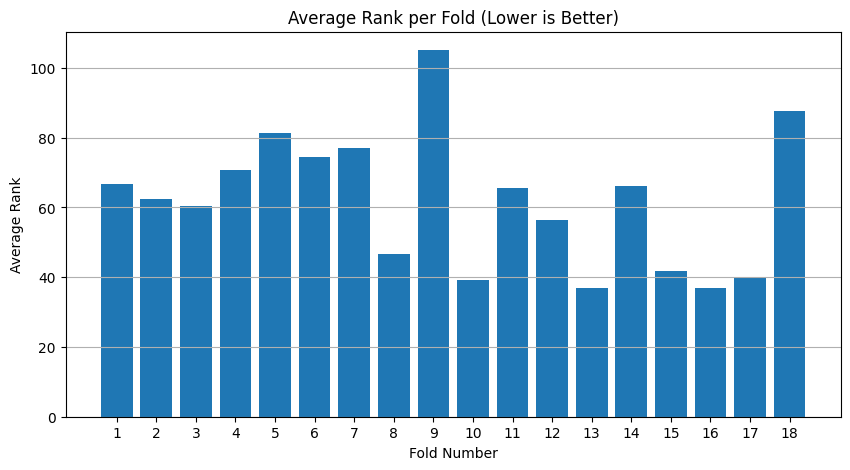

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, k + 1), fold_scores)
plt.title("Average Rank per Fold (Lower is Better)")
plt.xlabel("Fold Number")
plt.ylabel("Average Rank")
plt.grid(axis='y')
plt.xticks(range(1, k + 1))
plt.show()


### Which concepts can be decoded with more or less success?

In [ ]:
# Summary of individual concept ranks
sorted_concepts = sorted(concept_scores.items(), key=lambda x: x[1])
print("\nTop 5 Best Decoded Concepts:")
for concept, rank in sorted_concepts[:5]:
    print(f"{concept}: Rank {rank:.1f}")

print("\nTop 5 Worst Decoded Concepts:")
for concept, rank in sorted_concepts[-5:]:
    print(f"{concept}: Rank {rank:.1f}")


Top 5 Best Decoded Concepts:
do: Rank 1.0
food: Rank 1.0
time: Rank 1.0
great: Rank 2.0
laugh: Rank 4.0

Top 5 Worst Decoded Concepts:
electron: Rank 168.0
deceive: Rank 171.0
applause: Rank 175.0
cockroach: Rank 178.0
argumentatively: Rank 180.0


The average ranks for each fold range from 35-110:

Best fold: Fold 16 with average rank 36.80

Worst fold: Fold 9 with average rank 105.10

Mean of all folds: Approximately 60.57

This performance overall is better than chance, since random predictions would yield an average rank of approx. 90. Therefore, the decoder is learning meaningful patterns for the different concepts.

We can see from the top and worst decoded concepts that more general things like food, laugh etc.. can be decoded much better since these things are probably something that the patient connects to a lot and thinks about compared to some of the worst decoded concepts like cockroach or electron which the patient probably doesn't think about as much in their real life.

Yes, We believe that the results overall are satisfactory.

Above-chance decoding: The mean rank across folds is well below what would be considered chance i.e. (90), showing that the model is able to capture the neural patterns in the brain data.

Consistency: Many folds achieve ranks in the 30-60s, indicating reliable learning across different splits.

Interpretable trends: High performance on concrete concepts and low on abstract ones aligns with neuroscience expectations.

However, the high variance across folds (e.g., Fold 9 at 105) indicates some instability, possibly due to:
  - Imbalanced semantic categories per fold

  - Small test set (only 10 examples per fold)

This could be improved with stratified sampling or/and a larger training dataset.

# Export to PDF

Run the following cell to download the notebook as a nicely formatted pdf file.

In [ ]:
# Add to a new cell at the end of the notebook and run the follow code,
# which will save the notebook as pdf in your google drive (allow the permissions) and download it automatically.

!wget -nc https://raw.githubusercontent.com/lacclab/096222-colab-pdf/master/colab_pdf.py

from colab_pdf import colab_pdf

# If you saved the notebook in the default location in your Google Drive,
# and didn't change the name of the file, the code should work as is.
# If not, adapt accordingly.

colab_pdf(file_name='Pset_3.ipynb', notebookpath="/content/drive/MyDrive/Colab Notebooks/")

File ‘colab_pdf.py’ already there; not retrieving.



ValueError: file 'Pset_3.ipynb' not found in path '/content/drive/MyDrive/Colab Notebooks/'.